# Aprendizaje No Supervisado

### Importación de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

from scipy.spatial.distance import cdist

### Lectura de Datos

In [2]:
dataset = pd.read_csv("rain.csv",parse_dates=['date'])

In [3]:
dataset.head(20)

,date,rain
0,1978-01-01,0
1,1978-01-02,0
2,1978-01-03,0
3,1978-01-04,0
4,1978-01-05,0
5,1978-01-06,0
6,1978-01-07,0
7,1978-01-08,0
8,1978-01-09,0
9,1978-01-10,0


In [4]:
dataset.columns

Index(['date', 'rain'], dtype='object')

### Analisis de la variable *"rain"*

In [5]:
myDataSet = dataset.loc[:,['date', 'rain']]
myDataSet.set_index('date',inplace=True)
myDataSet.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0


In [6]:
dataset.describe()

,rain
count,15034.000000
mean,3.331914
std,11.451975
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,220.000000


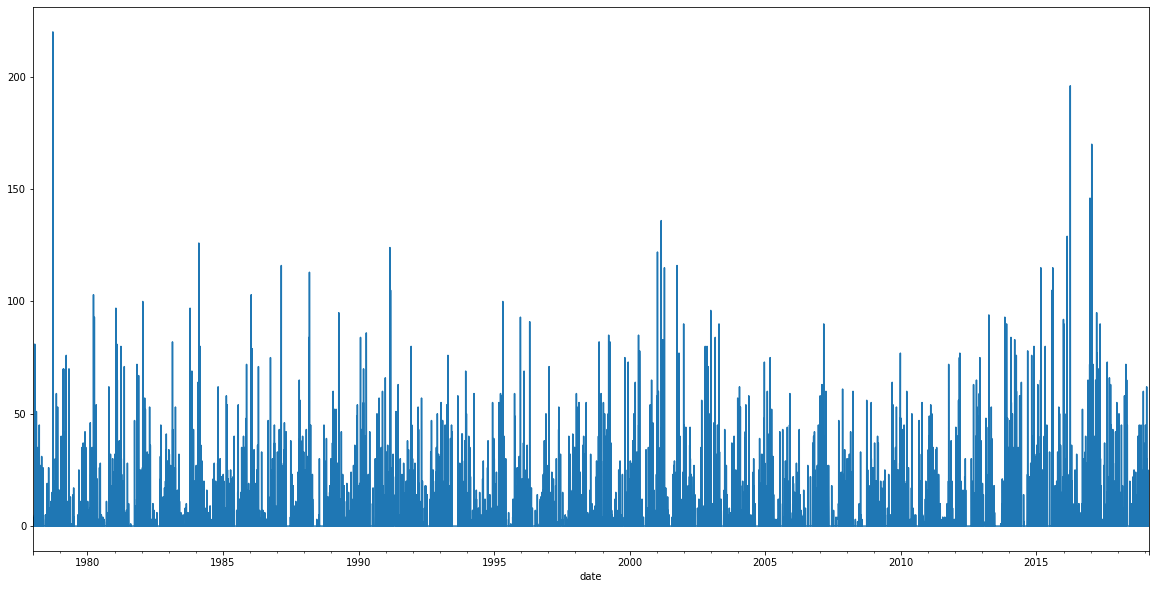

In [7]:
myDataSet.plot(figsize=[20,10],legend=False,)

### Filtrado de datos

In [8]:
#TO-DO Filtrar solo datos con registro de lluvia
X = myDataSet

In [9]:
X.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0


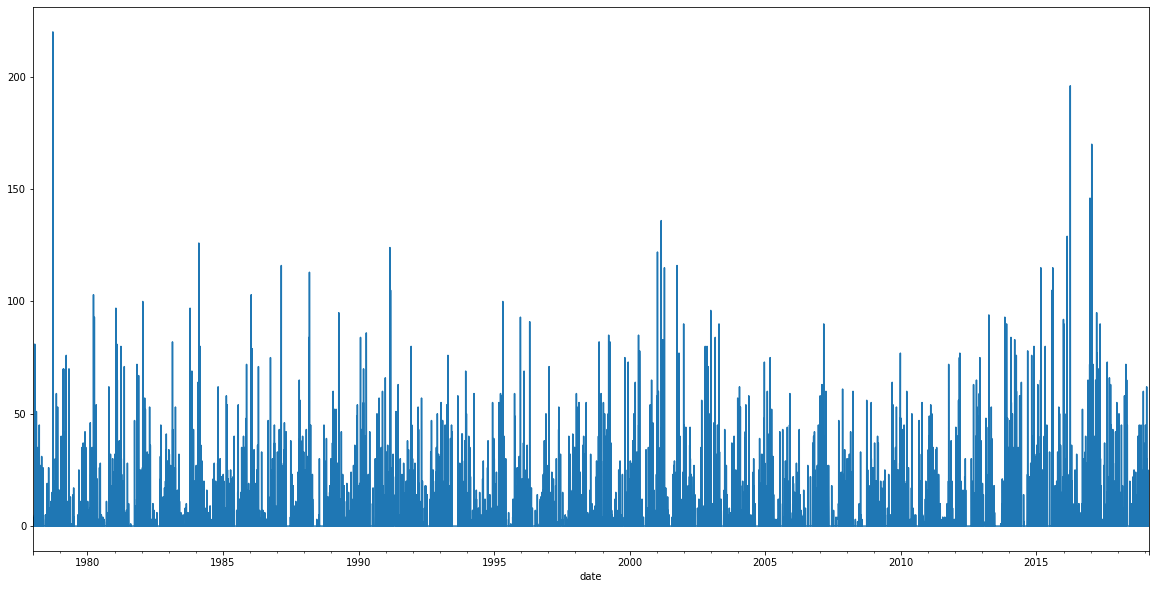

In [10]:
X.plot(figsize=[20,10],legend=False,)

### Aplicación de Elbow Method para analizar cantidad óptima de clusters

In [11]:
X = pd.DataFrame(X)

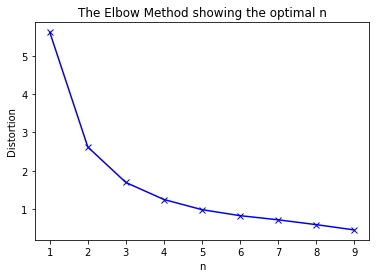

In [12]:
# k means determine k
distortions = []

# Análsis 1..10 clusters
N = range(1,10)

for n in N:
    kmeanModel = KMeans(n_clusters=n, n_jobs=-1)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(N, distortions, 'bx-')
plt.xlabel('n')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal n')
plt.show()

In [13]:
# TO-DO analizar resultado de Elbow Method e indicar cantidad de clusters que considere adecuada

In [14]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9194330688694781
For n_clusters = 3 The average silhouette_score is : 0.9140653610419767
For n_clusters = 4 The average silhouette_score is : 0.9110324604788109
For n_clusters = 5 The average silhouette_score is : 0.9100392186289836
For n_clusters = 6 The average silhouette_score is : 0.9086962724003419
For n_clusters = 7 The average silhouette_score is : 0.9111392100527921
For n_clusters = 8 The average silhouette_score is : 0.9113646675314994
For n_clusters = 9 The average silhouette_score is : 0.9113906634848341


In [15]:
# TO-DO Analizar silhouette_score e indicar cantidad de clusters que considere adecuada

In [16]:
# Coinciden la cantidad de clusters indicadas por Elbow Method y silhouette?

### Entreno K-Means

In [17]:
cant_clusters = 1

In [18]:
kmeanModel = KMeans(n_clusters=cant_clusters, verbose=0, n_jobs=-1)
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Visualización de elementos en cada cluster:

In [19]:
# TO-DO Mostrar y analizar elementos de cada cluster

### Visualizacion de centroides

In [0]:
# TO-DO Mostrar centroides de cada cluster